**Author:** Giulio Cordova

**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_confusion_matrix,RocCurveDisplay

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

# Data Preparation

In [4]:
X_test_df = pd.read_csv('best_X_test_con_nomi.csv', header = 0)
y_train_df = pd.read_csv('y_train_wo_outliers_num.csv', header = None)
X_train_df = pd.read_csv('best_X_train_con_nomi.csv', header = 0)
y_test_df = pd.read_fwf('y_test.txt', header = None)

In [5]:
X_test = X_test_df.values
y_train = y_train_df.values
X_train = X_train_df.values
y_test = y_test_df.values

In [6]:
X_train_n=np.zeros(shape=[0,23])
y_train_n=np.zeros(shape=[0,1])
for j in range(0,7274):
  if y_train[j]!=6:

    X_train_n = np.append(X_train_n, [X_train[j]], axis=0)
    y_train_n = np.append(y_train_n, [y_train[j]], axis=0)

In [7]:
X_test_n=np.zeros(shape=[0,23])
y_test_n=np.zeros(shape=[0,1])
for j in range(0,len(y_test)):
  if y_test[j]!=6:

    X_test_n = np.append(X_test_n, [X_test[j]], axis=0)
    y_test_n = np.append(y_test_n, [y_test[j]], axis=0)

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
from sklearn.inspection import permutation_importance

In [10]:
col_names=list(X_test_df.columns)

In [11]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
X=np.concatenate((X_train_n,X_test_n))
y=np.concatenate((y_train_n,y_test_n))

### Tuning the hyper-parameters

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [15]:
param_list = {'max_depth': [None,2,5,10,15,20],
              'min_samples_split': [2, 5, 10, 20,50,100],
              'min_samples_leaf': [1, 5, 10, 20,50,100],
              'n_estimators': [50,100,200]
              }
clf=RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)

print(grid_search.get_params)

grid_search.fit(X_train_n, y_train_n)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test_n)

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average='weighted'))
print(classification_report(y_test_n, y_pred))

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 20, 50, 100],
                         'n_estimators': [50, 100, 200]})>


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

KeyboardInterrupt: ignored

In [ ]:
grid_search.cv_results_['params'][grid_search.cv_results_['rank_test_score'][0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

Maximum accuracy:- 0.8655601659751038 at K = 4


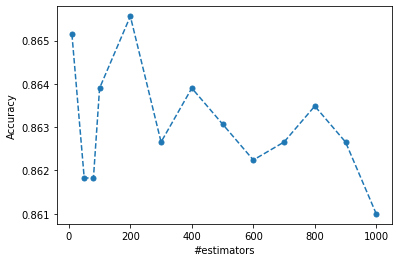

In [41]:
acc = []
n_estimators=[10,50,80,100,200,300,400,500,600,700,800,900,1000]
# Will take some time
from sklearn import metrics
for element in n_estimators:
    clf = RandomForestClassifier(random_state=42,max_depth=None, min_samples_leaf=10, 
                                 min_samples_split=5,n_estimators=element)
    clf.fit(X_train_n, y_train_n)
    y_pred = clf.predict(X_test_n)
    acc.append(accuracy_score(y_test_n, y_pred))
    
plt.figure(figsize=(6,4))
plt.plot(n_estimators,acc,linestyle='dashed', 
         marker='.',markersize=10)
#plt.title('accuracy vs. #estimators')
plt.xlabel('#estimators')
plt.ylabel('Accuracy')
plt.savefig('RF_accuracy.pdf', bbox_inches = 'tight')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))


In [16]:
clf = RandomForestClassifier(random_state=42,max_depth=None, min_samples_leaf=10, 
                                 min_samples_split=5,n_estimators=200)

clf.fit(X_train_n, y_train_n)
y_pred = clf.predict(X_test_n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

Maximum accuracy:- 0.8684647302904565 at K = 11


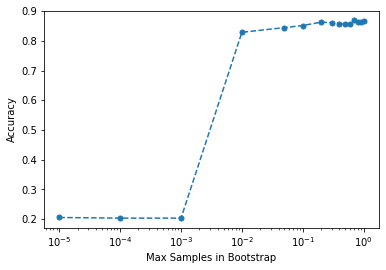

In [42]:
acc = []
max_samples=[0.00001,0.0001,0.001,0.01,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# Will take some time
from sklearn import metrics
for element in max_samples:
    clf = RandomForestClassifier(random_state=42,max_depth=None, min_samples_leaf=10, 
                                 min_samples_split=5,n_estimators=200,max_samples=element)
    clf.fit(X_train_n, y_train_n)
    y_pred = clf.predict(X_test_n)
    acc.append(accuracy_score(y_test_n, y_pred))
    
plt.figure(figsize=(6,4))
plt.plot(max_samples,acc,linestyle='dashed', 
         marker='.', markersize=10)
#plt.title('accuracy vs. #estimators')
plt.xlabel('Max Samples in Bootstrap')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.savefig('RF_maxsamples.pdf', bbox_inches = 'tight')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

##Cross Validation

In [ ]:
#clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy 0.895 +/- 0.027


##Feature importance

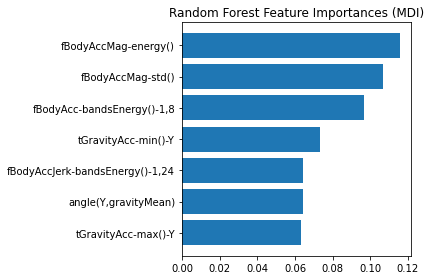

In [ ]:
nbr_features = 7

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(list(X_test_df.columns))[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.tight_layout()
plt.savefig('RF_importance.pdf', bbox_inches = 'tight')

plt.show()

In [ ]:
result = permutation_importance(clf, X_test_n, y_test_n, n_repeats=10, random_state=42, n_jobs=2)

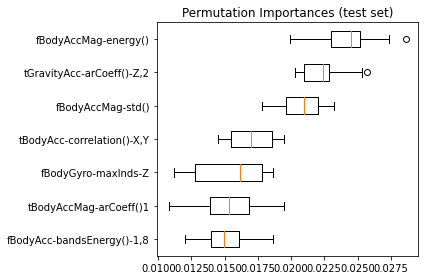

In [ ]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(col_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.savefig('random_importance.pdf', bbox_inches = 'tight')
plt.show()

##ROC, confusion matrix, etc.

In [28]:
target_names=['WALKING','WALKING UPSTAIRS','WALKING DOWNSTAIRS','SITTING','STANDING']

In [ ]:

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average='weighted'))
report=classification_report(y_test_n, y_pred,output_dict=True,digits=2,target_names=target_names)
report_df = pd.DataFrame(report).transpose()

print(report_df.to_latex())

Accuracy 0.8655601659751038
F1-score 0.8649020233883009
\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &     support \\
\midrule
WALKING            &   0.874773 &  0.971774 &  0.920726 &   496.00000 \\
WALKING UPSTAIRS   &   0.861053 &  0.868365 &  0.864693 &   471.00000 \\
WALKING DOWNSTAIRS &   0.972452 &  0.840476 &  0.901660 &   420.00000 \\
SITTING            &   0.858796 &  0.755601 &  0.803900 &   491.00000 \\
STANDING           &   0.799660 &  0.885338 &  0.840321 &   532.00000 \\
accuracy           &   0.865560 &  0.865560 &  0.865560 &     0.86556 \\
macro avg          &   0.873347 &  0.864311 &  0.866260 &  2410.00000 \\
weighted avg       &   0.869279 &  0.865560 &  0.864902 &  2410.00000 \\
\bottomrule
\end{tabular}



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


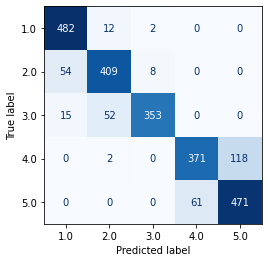

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      X_test_n,
                      y_test_n,
                      cmap='Blues',
                      values_format='d',
                      colorbar=False
                      )
plt.savefig('confusion_matrix_random_forest.pdf',bbox_inches = 'tight')

In [ ]:
def plot_multiclass_roc(clf, X, y, clf_name, ax = None):
    if not isinstance(y, type(np.array([]))):
        y = y.values
    if ax is None:
        fig = plt.figure(figsize = (6, 4))
        ax = fig.add_subplot()
    y_pred_proba = clf.predict_proba(X)   
    for i, label in enumerate(np.unique(y)):
        class_i_arr = (y == label).astype(int)
        class_i_prob_arr = y_pred_proba[:, i]
        RocCurveDisplay.from_predictions(class_i_arr, class_i_prob_arr,
                        name = clf_name + f' of class {label}', ax = ax)
    random = ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--', 
                 label = 'Random Classifier')
    ax.set_ylabel('True Positive Rate', fontsize = 14)
    ax.set_xlabel('False Positive Rate', fontsize = 14)

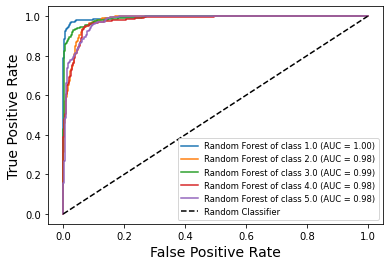

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf, X_test_n, y_test_n, 
                    'Random Forest', ax = ax)
ax.legend(fontsize = 'small')
plt.savefig('RF_multiclass_roc.pdf', bbox_inches = 'tight')
plt.show()

##Random Search

In [ ]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'n_estimators': [50,100,200,500]
              #'min_weight_fraction_leaf':list(np.arange(0,0.5,0.1)),
              #'max_features': ['log2','sqrt',None]
             }


warnings.filterwarnings(action='once')
random_search = RandomizedSearchCV(clf, param_distributions=param_list, 
                                   n_iter=50, cv=5,random_state=42)
random_search.fit(X_train_n, y_train_n)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test_n)

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average='weighted'))
print(classification_report(y_test_n, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy 0.8556016597510373
F1-score 0.8547970971346839
              precision    recall  f1-score   support

         1.0       0.84      0.97      0.90       496
         2.0       0.88      0.85      0.87       471
         3.0       0.95      0.82      0.88       420
         4.0       0.85      0.75      0.80       491
         5.0       0.80      0.88      0.84       532

    accuracy                           0.86      2410
   macro avg       0.86      0.85      0.86      2410
weighted avg       0.86      0.86      0.85      2410



In [ ]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

###Out of bag error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed whe

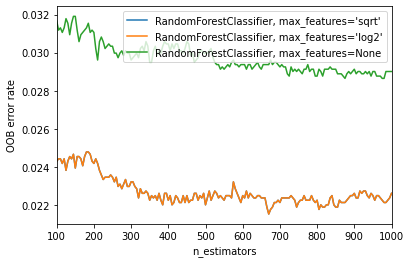

In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


RANDOM_STATE = 42

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# Bagging

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

In [ ]:
param_list = {'max_depth': [None,2,5,10,15,20],
              'min_samples_split': [2, 5, 10, 20,50,100],
              'min_samples_leaf': [1, 5, 10, 20,50,100],
              'n_estimators': [50,100,200]
              }
clf=BaggingClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)

print(grid_search.get_params)

grid_search.fit(X_train_n, y_train_n)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test_n)

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average='weighted'))
print(classification_report(y_test_n, y_pred))

In [ ]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train_n, y_train_n)

y_pred = clf.predict(X_test_n)

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average=None))
print(classification_report(y_test_n, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.8551867219917012
F1-score [0.91187739 0.82787751 0.86079183 0.82023681 0.85049239]
              precision    recall  f1-score   support

         1.0       0.87      0.96      0.91       496
         2.0       0.82      0.83      0.83       471
         3.0       0.93      0.80      0.86       420
         4.0       0.87      0.78      0.82       491
         5.0       0.81      0.89      0.85       532

    accuracy                           0.86      2410
   macro avg       0.86      0.85      0.85      2410
weighted avg       0.86      0.86      0.85      2410



In [ ]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train_n, y_train_n)

y_pred = clf.predict(X_test_n)

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average=None))
print(classification_report(y_test_n, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.8800829875518672
F1-score [0.91771539 0.84090909 0.88888889 0.85959271 0.88648649]
              precision    recall  f1-score   support

         1.0       0.88      0.96      0.92       496
         2.0       0.90      0.79      0.84       471
         3.0       0.86      0.91      0.89       420
         4.0       0.91      0.82      0.86       491
         5.0       0.85      0.92      0.89       532

    accuracy                           0.88      2410
   macro avg       0.88      0.88      0.88      2410
weighted avg       0.88      0.88      0.88      2410



In [ ]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train_n, y_train_n)

y_pred = clf.predict(X_test_n)

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average=None))
print(classification_report(y_test_n, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.8680497925311204
F1-score [0.925      0.86446105 0.9122807  0.80516685 0.83870968]
              precision    recall  f1-score   support

         1.0       0.88      0.97      0.92       496
         2.0       0.87      0.86      0.86       471
         3.0       0.96      0.87      0.91       420
         4.0       0.85      0.76      0.81       491
         5.0       0.80      0.88      0.84       532

    accuracy                           0.87      2410
   macro avg       0.87      0.87      0.87      2410
weighted avg       0.87      0.87      0.87      2410



In [ ]:
clf=BaggingClassifier()

In [ ]:
param_list = {'base_estimator': [RandomForestClassifier(),SVC(),None],
              'n_estimators': [10,50,100,500,1000]
             }


warnings.filterwarnings(action='once')
random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train_n, y_train_n)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test_n)

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average='weighted'))
print(classification_report(y_test_n, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_o

KeyboardInterrupt: ignored

# Boosting

In [18]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [24]:
# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 30,50,75, 100]
grid['learning_rate'] = [0.001, 0.01, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.779477 using {'learning_rate': 0.1, 'n_estimators': 30}
0.436552 (0.000286) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.436552 (0.000286) with: {'learning_rate': 0.001, 'n_estimators': 30}
0.436552 (0.000286) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.436552 (0.000286) with: {'learning_rate': 0.001, 'n_estimators': 75}
0.436552 (0.000286) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.436552 (0.000286) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.586080 (0.047499) with: {'learning_rate': 0.01, 'n_estimators': 30}
0.682718 (0.009643) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.701741 (0.011230) with: {'learning_rate': 0.01, 'n_estimators': 75}
0.711453 (0.016797) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.436552 (0.000286) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.586080 (0.047499) with: {'learning_rate': 0.01, 'n_estimators': 30}
0.682718 (0.009643) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.701741 (0.011230)

visualisation of best number of estimators

In [29]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=30, random_state=1,learning_rate=0.1)
clf.fit(X_train_n, y_train_n)

y_pred = clf.predict(X_test_n)

print('Accuracy %s' % accuracy_score(y_test_n, y_pred))
print('F1-score %s' % f1_score(y_test_n, y_pred, average='weighted'))
report=classification_report(y_test_n, y_pred,output_dict=True,digits=2,target_names=target_names)
report_df = pd.DataFrame(report).transpose()

print(report_df.to_latex())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.7514522821576763
F1-score 0.7425956915463648
\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &      support \\
\midrule
WALKING            &   0.727410 &  0.973790 &  0.832759 &   496.000000 \\
WALKING UPSTAIRS   &   0.824480 &  0.757962 &  0.789823 &   471.000000 \\
WALKING DOWNSTAIRS &   0.951724 &  0.657143 &  0.777465 &   420.000000 \\
SITTING            &   0.785965 &  0.456212 &  0.577320 &   491.000000 \\
STANDING           &   0.638211 &  0.885338 &  0.741732 &   532.000000 \\
accuracy           &   0.751452 &  0.751452 &  0.751452 &     0.751452 \\
macro avg          &   0.785558 &  0.746089 &  0.743820 &  2410.000000 \\
weighted avg       &   0.777712 &  0.751452 &  0.742596 &  2410.000000 \\
\bottomrule
\end{tabular}



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Maximum accuracy:- 0.7514522821576763 at K = 1


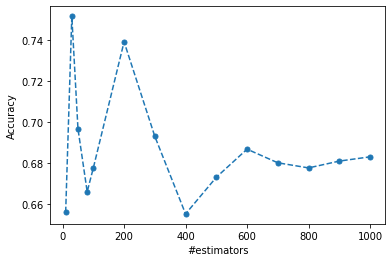

In [43]:
acc = []
n_estimators=[10,30,50,80,100,200,300,400,500,600,700,800,900,1000]
# Will take some time
from sklearn import metrics
for element in n_estimators:
    clf = AdaBoostClassifier(random_state=1,learning_rate=0.1,n_estimators=element)
    clf.fit(X_train_n, y_train_n)
    y_pred = clf.predict(X_test_n)
    acc.append(accuracy_score(y_test_n, y_pred))
    
plt.figure(figsize=(6,4))
plt.plot(n_estimators,acc,linestyle='dashed', 
         marker='.', markersize=10)
#plt.title('accuracy vs. #estimators')
plt.xlabel('#estimators')
plt.ylabel('Accuracy')
plt.savefig('Ada_accuracy.pdf', bbox_inches = 'tight')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Max samples

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Maximum accuracy:- 0.7514522821576763 at K = 0


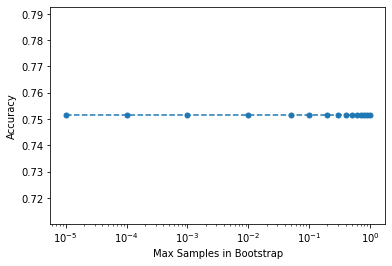

In [44]:
acc = []
max_samples=[0.00001,0.0001,0.001,0.01,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# Will take some time
from sklearn import metrics
for element in max_samples:
    clf = AdaBoostClassifier(base_estimator=None, n_estimators=30,learning_rate=0.1, random_state=1)
    clf.fit(X_train_n, y_train_n)
    y_pred = clf.predict(X_test_n)
    acc.append(accuracy_score(y_test_n, y_pred))
    
plt.figure(figsize=(6,4))
plt.plot(max_samples,acc,linestyle='dashed', 
         marker='.', markersize=10)
#plt.title('accuracy vs. #estimators')
plt.xlabel('Max Samples in Bootstrap')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.savefig('Ada_maxsamples.pdf', bbox_inches = 'tight')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))